#### Question of the day 
At the beginning of the summer, my wife and I welcomed a new little one to our family. Leading up to the birth, as we tried to get our ducks in a row - going through the wide ranging lists of what you do and dont need, enjoying trying some new restaurants before logistics get more complicated, and sleeping full nights, one question kept popping up - How would we move this little one around after he was born? As a bit of a bike nerd, and living in a quite bike accessible US city I enjoy getting around by bicycle, I was naturally chomping at the bit to bring our son along in our front-loading cargo bike, rolling around on summer days to friends houses, parks, bakeries, and all my favorite Portland spots. How soon could I strap him in and bring him along? 

An initial google search  turns up pieces from [American Society of Pediatrics](https://publications.aap.org/aapnews/article/30/7/18/7876/Pedal-safely-when-biking-with-baby-on-board?searchresult=1?autologincheck=redirected) and [Bicycle Helpmet Safety Institute](https://helmets.org/little1s.htm), which comment on  how to transport children safely once they can sit upright and wear a helmet, often in a seat attached behind the bike over the rear wheel or in a trailer. But what about the first year? Are cars truly the only safe way to transport a child in the first year of life? What about a well designed cargo bike with an infant car seat adapter? 

The concerns with doing this include both  accidents and the risk of repeated impact to a developing brain from vibration, summarized well in this quote from a [Bike Portland](https://bikeportland.org/2009/08/24/carrying-your-infant-by-bike-how-young-is-too-young-22374) blog post on the topic

<img src="img/Quote_infantCarSeat.png" alt="da bike" width="600"/>

One important point of clarification, is that my question concerns *engineered infant seat biking solutions*. My question is not wondering if it is safe to ratchet strap my baby seat onto the rear rack of a normal bicycle - its not! But for a bike designed to stabily carry cargo/children, with adapters designed for infants/children, how does the risk actually compare with transport by automobile? We will go into all the different options out there on the markets below. 


After reading dozens of blogs and articles, my conclusion was this: There are a lot of opinions on this topic, and absolutely no data on it. The people asking the question are generally bike people, who think cars are bad and that it is a bit silly to think of cars as low risk transportation, and are willing to assume a small risk and ride slowly with their infants. On the other hand, mention that you might transport a child by bicycle and most Americans think you are dooming your child to anger issues and struggling in school. Even considering that this is more common in places like copenhagen and amsterdam, The bike portland blog points out that their bikes have "wide, soft tires that absorb impact and vibration", and the distances traveled are generally much shorter. 

As an engineer, these opinions are not particularly helpful, and leave open a whole host of questions: How does the vibration actually compare between an infant seat in a cargo bike and a ride in a car? How "wide and soft" would the tires have to be to sufficiently absorb vibration? Fortunately, since a lot of these articles were written, some of the measurement tools that were once the privy of large research institutions are now sitting in all of our pockets. This left me wondering - Could some "Cell Phone Science", using the accelerometers on our phones, answer some of these questions? 



Ultimately, if we want to enable car-free  transportation in cities, locking young families into their car for the first year of their life is counterproductive, and when it comes to Portland in the summertime, honestly, just a lot less fun. 

<img src="img/Bakfiets_Stock.jpg" alt="da bike" width="450"/> 


#### Existing infant seat solutions
[BabyMe infant seat adapter](https://bunchbike.com/products/babymee-maxi-cosi-adapter)

[Thule Infant sling](https://www.thule.com/en-us/bike-trailers/bike-trailer-accessories/thule-infant-sling-_-20101000)


#### Measurement Approach
App used: "Vibration Analysis" by Dmitriy Kharutskiy

Physical Setup: 
First pass I just wanted to get a baseline. My Reise and Muller Transporter 2 didnt come with an infant seat adapter, so I created a simple one using a memory phone pillow, and the cushioned seat. The car seat base attaches the same way as in a car, and then the infant seat to the car seat base. A Wooden "Baby" with iPhone secured to the top was sinched into the car seat via the normal child straps. 

<img src="img/Bike_Full_Setup.jpg" alt="da bike" width="300"/>  <img src="img/Base_in_Bike_Top_View.jpg" alt="da bike" width="300"/>

#### Experimental Approach 1: Speed Bumps
Since Speed bumps are a standard "bump in the road", we started by hitting a speed bump 3-4 times at 5mph, 10mph, 15mph, and 20mph in the Cargo bike. 

Cargo bike is a Riese and Muller Transporter 2 with 20" x 2.15 front tire and 26" x 2.4" rear tire, inflated to 45psi each. 

Then we repeated that in a 2017 Chevy Bolt, with the car seat behind the passenger side. Car Tires were inflated to 38psi 

By Accident,  For the first 8 runs, we only got the first 35 seconds of data on this due to an exporting error, but it provides a place to start. After that they are longer. 


| Run #         | Vehicle     | Type of run | Tire PSI | File Name |
|--------------|-----------   |------------|------------|------------|
| 1            | RM Cargo Bike| Speed Bump | 45         | SavedData_20240720_114122_5mph |
| 2            | RM Cargo Bike| Speed Bump | 45         | SavedData_20240720_114537_10mph |
| 3            | RM Cargo Bike| Speed Bump | 45         | SavedData_20240720_115009_15mph |
| 4            | RM Cargo Bike| Speed Bump | 45         | SavedData_20240720_115449_20mph |
| 5            | Bolt, car    | Speed Bump | 38         | SavedData_20240728_123435_Bolt 5mph |
| 6            | Bolt, car    | Speed Bump | 38         | SavedData_20240728_123641_Bolt 10mph |
| 7            | Bolt, car    | Speed Bump | 38         | SavedData_20240728_123948_Bolt 15mph |
| 8            | Bolt, car    | Speed Bump | 38         | SavedData_20240728_124341_Bolt 20mph |
| 9            | Bolt, car    | Powell-Holgate Loop | 38         | 20240808_133826_AllData_Bolt_Nussbaums |
| 10            | Bolt, car    | Airport Run | 38         | 20240809_062515_AllData_Bolt_Airport|


In [20]:
# Setting up
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import Image

## Vibration Analysis


What matters when it comes to vibration?
1. Maximum force experienced?
2. Total number of bumps? Perhaps a bajillion smaller bumps, i.e. "repeated micro-trauma" is the concern?



What Questions Could we ask?
1. How does a child experience the same exact bump in a cargo bike vs a car?
2. How does driving a given route, vs biking the same route compare?
3. What would a child experience on a typical drive across the city?


How could we analyze it?
1. Look at magnitude of G forces
2. Look at the number of bumps experienced over a certain magnitude
3. Compare Frequency Spectrums
4. Compare the "Jerk" derivative of acceleration (i.e. how much does the force needed to stabilize his neck muscle change?). If we have a constant force applying to an infants head pushing it back into the car seat, that is different from a force that pulls  his head forward, then letting it recoil. 
5. Do a fatigue "Rainflow" analysis, where you essentially look at all the frequencies, their magnitudes and sum up the "damage"


In [117]:
#Set the sampling frequency for all runs
sampling_frequency = 100 #hz
## ![title](img/Base_in_Bike_Top_View.jpg)

#### Data first look - Cargo bike Runs 

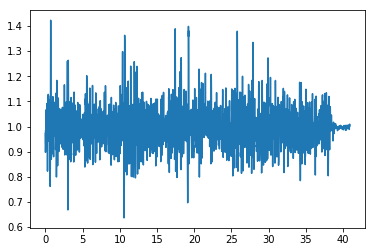

In [118]:
# Lets import the first text file
#filepath = os.path('Users/aglick/Documents/Vibration Analysis Cargo Bike/')
file = 'SavedData_20240720_114122_5mph.txt'
data5 = pd.read_csv(file,header = 20,names=['X','Y','Z'],sep=';',skipfooter = 1,engine='python')# Read in CSV file
data5['YZRes']= (data5.Y**2+data5.Z**2)**(1/2) #Take the resultant of the Z and Y directions

#Convert Index to seconds
data5.index = np.arange(len(data5))/sampling_frequency

#Plot the results
data5['YZRes'].plot()

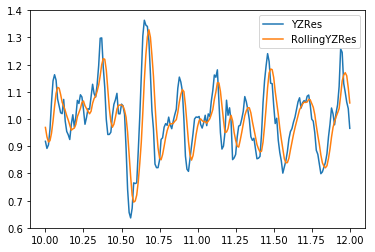

In [156]:
# Lets try smoothing it out a bit with a simple rolling average

rolling = data5.YZRes.rolling(window=5)# Tail-rolling average transform
data5['RollingYZRes'] = rolling.mean()
data5.loc[10:12].plot(y=['YZRes','RollingYZRes'])

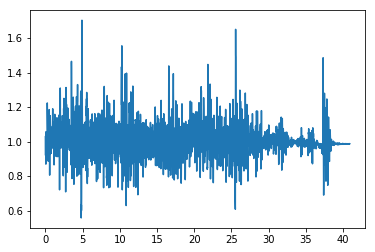

In [119]:
file = 'SavedData_20240720_114537_10mph.txt'
data10 = pd.read_csv(file,header = 20,names=['X','Y','Z'],sep=';',skipfooter = 1,engine='python')
data10['YZRes']= (data10.Y**2+data10.Z**2)**(1/2)
#Convert Index to seconds
data10.index = np.arange(len(data10))/sampling_frequency

data10['YZRes'].plot()

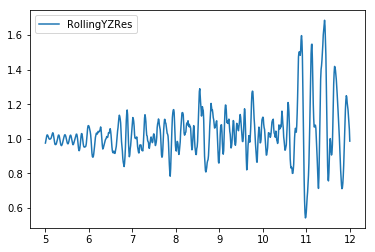

In [190]:
file = 'SavedData_20240720_115009_15mph.txt'
data15 = pd.read_csv(file,header = 20,names=['X','Y','Z'],sep=';',skipfooter = 1,engine='python')
data15['YZRes']= (data15.Y**2+data15.Z**2)**(1/2)
#Convert Index to seconds
data15.index = np.arange(len(data15))/sampling_frequency

#Make it a smoothie
rolling = data15.YZRes.rolling(window=5)# Tail-rolling average transform
data15['RollingYZRes'] = rolling.mean()

#Look at Jerk
data15['AccelDelta'] = data15['RollingYZRes'].diff()
data15['Jerk'] = data15.RollingYZRes/data15.AccelDelta

#Plot
data15.loc[5:12].plot(y = 'RollingYZRes')

In [ ]:
file = 'SavedData_20240720_115449_20mph.txt'
data20 = pd.read_csv(file,header = 20,names=['X','Y','Z'],sep=';',skipfooter = 1,engine='python')
data20['YZRes']= (data20.Y**2+data20.Z**2)**(1/2)
#Convert Index to seconds
data20.index = np.arange(len(data20))/sampling_frequency
data20['YZRes'].plot()
data20.loc[20:25].plot(y = 'YZRes')

#### Data first look - Bolt Runs 

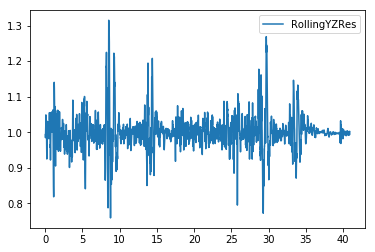

In [186]:
file = 'SavedData_20240728_123948_Bolt 15mph.txt'
dataBolt15 = pd.read_csv(file,header = 20,names=['X','Y','Z'],sep=';',skipfooter = 1,engine='python')
dataBolt15['YZRes']= (dataBolt15.Y**2+dataBolt15.Z**2)**(1/2)
#Convert Index to seconds
dataBolt15.index = np.arange(len(dataBolt15))/sampling_frequency

#Can I make it a Smoothie?
# Tail-rolling average transform
rolling = dataBolt15.YZRes.rolling(window=5)
dataBolt15['RollingYZRes'] = rolling.mean()
dataBolt15.plot(y = 'RollingYZRes')

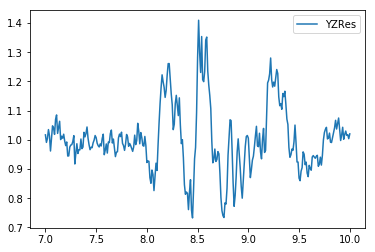

In [178]:
dataBolt15.loc[7:10].plot(y='YZRes')

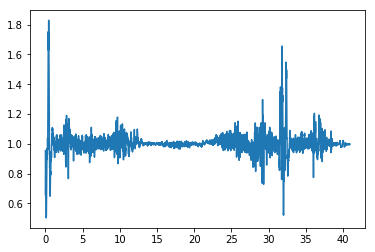

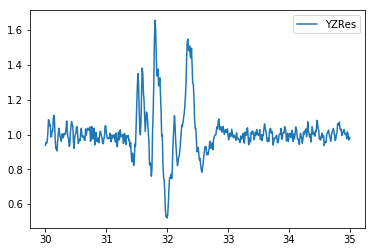

In [187]:

file = 'SavedData_20240728_124341_Bolt 20mph.txt'
dataBolt20 = pd.read_csv(file,header = 20,names=['X','Y','Z'],sep=';',skipfooter = 1,engine='python')
dataBolt20['YZRes']= (dataBolt20.Y**2+dataBolt20.Z**2)**(1/2)
#Convert Index to seconds
dataBolt20.index = np.arange(len(dataBolt20))/sampling_frequency
dataBolt20['YZRes'].plot()
#dataBolt20.loc[30:35].plot(y = 'YZRes')
#Can I make it a Smoothie?
# Tail-rolling average transform
rolling = dataBolt20.YZRes.rolling(window=5)
dataBolt20['RollingYZRes'] = rolling.mean()
dataBolt20.loc[30:35].plot(y = 'YZRes')


#Look at Jerk
dataBolt20['AccelDelta'] = dataBolt20['RollingYZRes'].diff()
dataBolt20['Jerk'] = dataBolt20.RollingYZRes/dataBolt20.AccelDelta

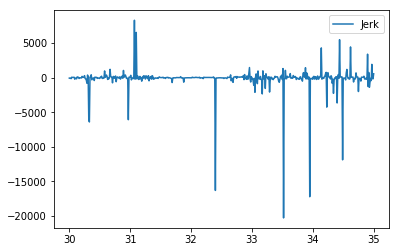

In [183]:
dataBolt20.loc[30:35].plot(y = 'Jerk')

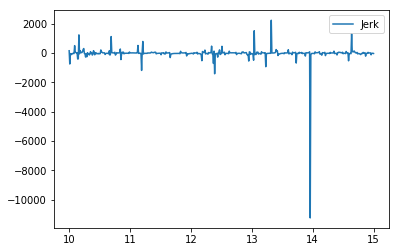

In [191]:
#Compare the Cargo bike Jerk
data15.loc[10:15].plot(y = 'Jerk')

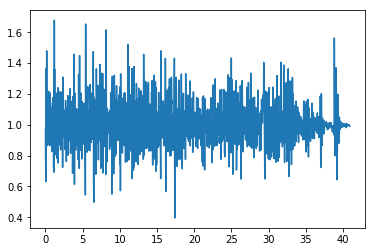

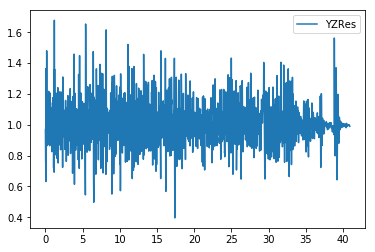

In [188]:

file = 'SavedData_20240721_134617_To Market 15-20mph.txt'
dataBikeToMarket15_20= pd.read_csv(file,header = 20,names=['X','Y','Z'],sep=';',skipfooter = 1,engine='python')
dataBikeToMarket15_20['YZRes']= (dataBikeToMarket15_20.Y**2+dataBikeToMarket15_20.Z**2)**(1/2)
#Convert Index to seconds
dataBikeToMarket15_20.index = np.arange(len(dataBikeToMarket15_20))/sampling_frequency
dataBikeToMarket15_20['YZRes'].plot()
#dataBolt20.loc[30:35].plot(y = 'YZRes')
#Can I make it a Smoothie?
# Tail-rolling average transform
rolling = dataBikeToMarket15_20.YZRes.rolling(window=5)
dataBikeToMarket15_20['RollingYZRes'] = rolling.mean()
dataBikeToMarket15_20.plot(y = 'YZRes')


#### Data first look - Bolt longer runs
First run is to Powell, 80th, holgate, and foster back to 50th and powell
Second is from 50th and Powell to Airport and back

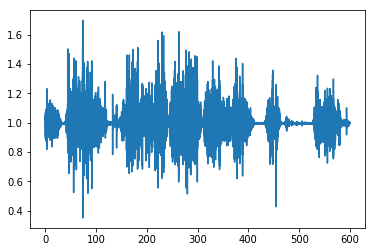

In [193]:
file = '20240808_133826_AllData_Bolt_Nussbaums.txt'
dataBoltPowellHolgate =  pd.read_csv(file,header = 20,names=['X','Y','Z'],sep=';',skipfooter = 1,engine='python')
dataBoltPowellHolgate['YZRes']= (dataBoltPowellHolgate.Y**2+dataBoltPowellHolgate.Z**2)**(1/2)
#Convert Index to seconds
dataBoltPowellHolgate.index = np.arange(len(dataBoltPowellHolgate))/sampling_frequency
dataBoltPowellHolgate['YZRes'].plot()

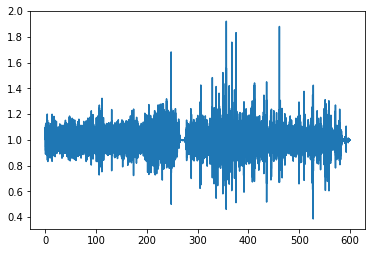

In [194]:
file = '20240809_062515_AllData_Bolt_Airport.txt'
dataBoltAirport =  pd.read_csv(file,header = 20,names=['X','Y','Z'],sep=';',skipfooter = 1,engine='python')
dataBoltAirport['YZRes']= (dataBoltAirport.Y**2+dataBoltAirport.Z**2)**(1/2)
#Convert Index to seconds
dataBoltAirport.index = np.arange(len(dataBoltAirport))/sampling_frequency
dataBoltAirport['YZRes'].plot()